In [19]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv('Submission.csv')

In [21]:
# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

Initial Data:
    timestamp  is_anomaly
0  1425008573       False
1  1425008873       False
2  1425009173       False
3  1425009473       False
4  1425009773       False


In [22]:
# Data Preprocessing
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
timestamp     0
is_anomaly    0
dtype: int64


In [23]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Feature Engineering
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute
data['second'] = data['timestamp'].dt.second
data['dayofweek'] = data['timestamp'].dt.dayofweek


In [24]:
# Prepare the features for anomaly detection
features = ['year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek']
X = data[features]

# Implement Isolation Forest
isolation_forest = IsolationForest(contamination='auto', random_state=42)
data['anomaly_score'] = isolation_forest.fit_predict(X)

# Map the anomaly scores to boolean values
data['predicted_anomaly'] = data['anomaly_score'] == -1

# Compare the predicted anomalies with the actual 'is_anomaly' labels
confusion_matrix = pd.crosstab(data['is_anomaly'], data['predicted_anomaly'], rownames=['Actual'], colnames=['Predicted'])

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
Predicted  False  True 
Actual                 
False       3201  11853
True         126    650


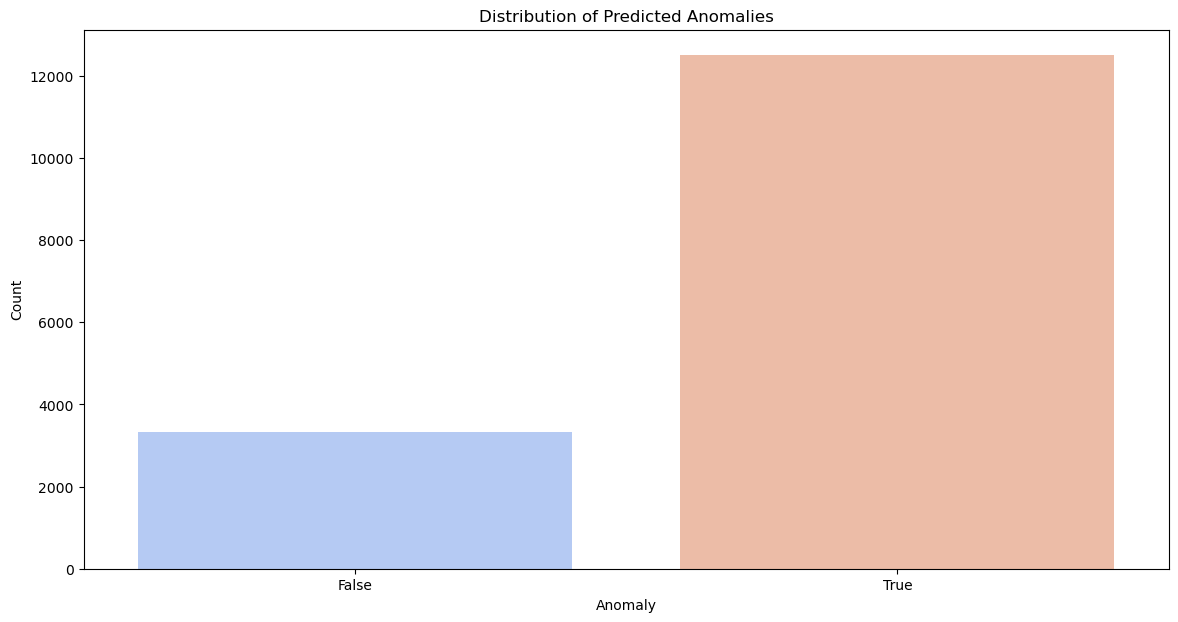

In [25]:
# Plot the distribution of anomalies
plt.figure(figsize=(14, 7))
sns.countplot(x='predicted_anomaly', data=data, palette='coolwarm')
plt.title('Distribution of Predicted Anomalies')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

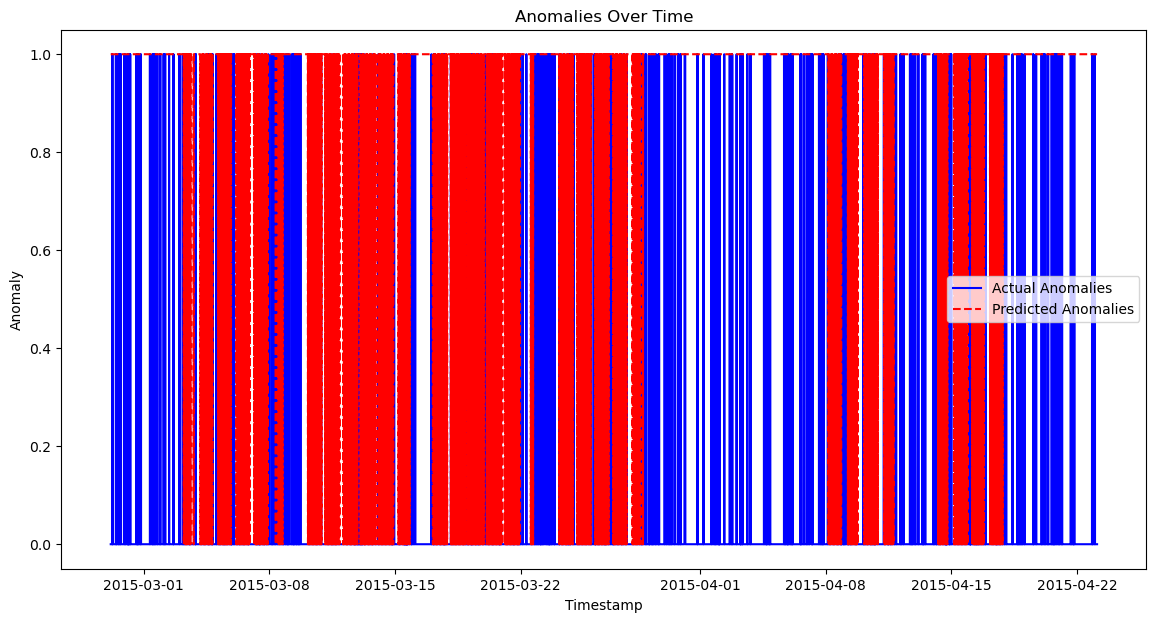

In [26]:
# Plot anomalies over time
plt.figure(figsize=(14, 7))
plt.plot(data['timestamp'], data['is_anomaly'], label='Actual Anomalies', color='blue')
plt.plot(data['timestamp'], data['predicted_anomaly'], label='Predicted Anomalies', linestyle='--', color='red')
plt.title('Anomalies Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly')
plt.legend()
plt.show()

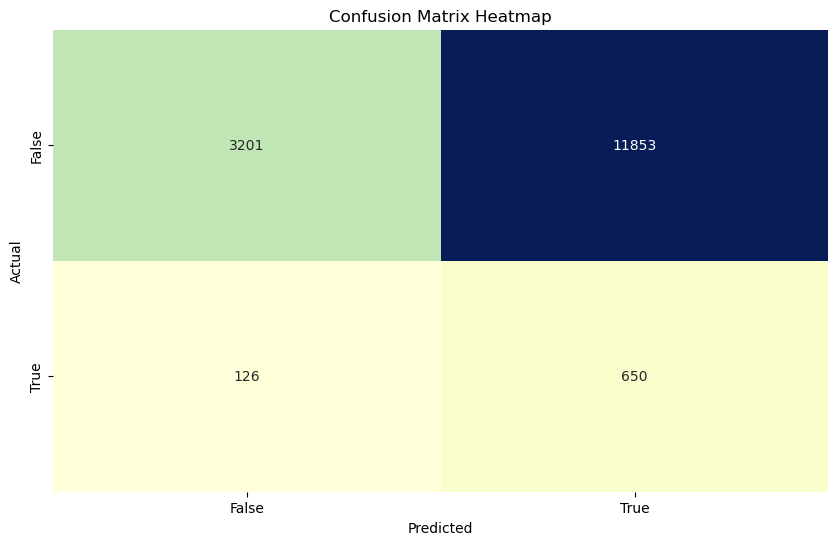

In [27]:
# Plot confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()